In [1]:
import cv2
import numpy as np
from cryptography.fernet import Fernet
import matplotlib.pyplot as plt


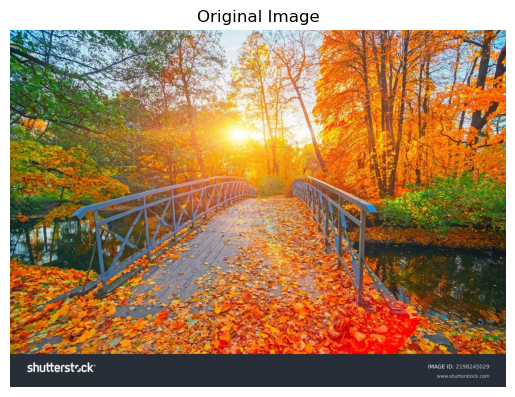

In [2]:
import cv2
from matplotlib import pyplot as plt

# Reading the image
image = cv2.imread('Nature.jpg')

# Checking if image is loaded
if image is None:
    print("Image not loaded. Please check the filename or path.")
else:
    # Convert BGR to RGB for proper display in matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Show the image
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()


In [3]:
!pip uninstall -y crypto
!pip uninstall -y pycryptodome
!pip uninstall -y pycryptodomex


Found existing installation: pycryptodome 3.23.0
Uninstalling pycryptodome-3.23.0:
  Successfully uninstalled pycryptodome-3.23.0


In [4]:
!pip install pycryptodome


Defaulting to user installation because normal site-packages is not writeable
  Using cached pycryptodome-3.23.0-cp37-abi3-win_amd64.whl.metadata (3.5 kB)
Using cached pycryptodome-3.23.0-cp37-abi3-win_amd64.whl (1.8 MB)


In [5]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import os


In [1]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
import os
import cv2
import numpy as np

#  Load the image
image_path = "Nature.jpg"
image = cv2.imread(image_path)

# Convert image to bytes
image_bytes = image.tobytes()

#  Generate AES key (16 bytes for AES-128)
key = os.urandom(16)

#  Create cipher (ECB mode)
cipher = AES.new(key, AES.MODE_ECB)

# Pad and encrypt
padded_data = pad(image_bytes, AES.block_size)
encrypted_bytes = cipher.encrypt(padded_data)

# Save encrypted data to file
with open("encrypted_Nature.aes", "wb") as file:
    file.write(encrypted_bytes)

print("✅ Nature.jpg encrypted and saved as 'encrypted_Nature.aes'")


✅ Nature.jpg encrypted and saved as 'encrypted_Nature.aes'


In [2]:
with open("aes_key.key", "wb") as key_file:
    key_file.write(key)


In [3]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad
import cv2
import numpy as np

#  Load the encrypted data
with open("encrypted_Nature.aes", "rb") as enc_file:
    encrypted_data = enc_file.read()

# Load the key
with open("aes_key.key", "rb") as key_file:
    key = key_file.read()

# Create AES cipher
cipher = AES.new(key, AES.MODE_ECB)

#  Decrypt and unpad
decrypted_bytes = unpad(cipher.decrypt(encrypted_data), AES.block_size)

# Convert decrypted bytes back to image
# You already know the shape from original image, so reload it
original_image = cv2.imread("Nature.jpg")
shape = original_image.shape

# Convert bytes to image
decrypted_image = np.frombuffer(decrypted_bytes, dtype=np.uint8).reshape(shape)

# Save or show the decrypted image
cv2.imwrite("decrypted_Nature.jpg", decrypted_image)

print("✅ Image decrypted and saved as 'decrypted_Nature.jpg'")


✅ Image decrypted and saved as 'decrypted_Nature.jpg'


In [5]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable


In [1]:
#Use a Pretrained Model (MobileNetV2)
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

# Load MobileNetV2 model
model = MobileNetV2(weights="imagenet")

# Load decrypted image
img_path = "decrypted_Nature.jpg"
img = image.load_img(img_path, target_size=(224, 224))

# Convert image to array and preprocess
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predict
preds = model.predict(x)

# Decode and print results
decoded = decode_predictions(preds, top=3)[0]
for i, (imagenet_id, label, confidence) in enumerate(decoded):
    print(f"{i+1}. {label} - {confidence*100:.2f}%")


35363/35363 [==============================] - 0s 2us/step
1. bannister - 33.53%
2. worm_fence - 12.97%
3. valley - 10.34%


In [2]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the pre-trained model
model = MobileNetV2(weights='imagenet')

# Load your image
img_path = 'Nature.jpg'  # Make sure this image is in the same directory
img = image.load_img(img_path, target_size=(224, 224))

# Convert image to array
x = image.img_to_array(img)

# Expand dimensions to match model input
x = np.expand_dims(x, axis=0)

# Preprocess the input image
x = preprocess_input(x)

# Predict using the model
preds = model.predict(x)

# Decode and print predictions
print("Predicted:", decode_predictions(preds, top=3)[0])


1/1 [==============================] - 2s 2s/step
Predicted: [('n02788148', 'bannister', 0.3239943), ('n04604644', 'worm_fence', 0.15351404), ('n09468604', 'valley', 0.091678694)]


In [2]:
import sys
print(sys.executable)


C:\Users\syeds\.conda\envs\tf310\python.exe


In [1]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import os

print("✅ Crypto module is working!")


✅ Crypto module is working!


In [2]:
#  Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

#  Load the model
model = MobileNetV2(weights='imagenet')

#  Load the decrypted image
img_path = 'decrypted_Nature.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Preprocess the image
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

#  Predict the image class
preds = model.predict(x)

#  Decode and show predictions
decoded = decode_predictions(preds, top=3)[0]
print("🔍 Top Predictions:")
for label in decoded:
    print(f"👉 {label[1]} ({round(label[2]*100, 2)}%)")


1/1 [==============================] - 2s 2s/step
🔍 Top Predictions:
👉 bannister (33.53%)
👉 worm_fence (12.97%)
👉 valley (10.34%)
